### 数据探索与可视化

##### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

##### 实验要求
1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

In [ ]:
import pandas as pd
raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.precision', 3)
pd.set_option('display.max_colwidth', 6)
print(raw_data)

这里的一些显示选项的含义如下:

 **display.max_rows**:显示的最大行数

 **display.max_columns**:显示的最大列数

 **display.unicode.ambiguous_as_wide**和**display.unicode.east_asian_width**:帮助调整对齐方式，使输出更加整齐

 **display.precisio**:设置浮点数的保留小数位数
 
 **display.max_colwidth**:设置每一列的最大宽度

In [13]:
import pandas as pd
raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_colwidth', 6)
# print(raw_data.head())
# print(raw_data.info())
print(raw_data.describe())

       public_repos  public_gists  followers  following  text_bot_count
count  19...         19...         19...      19...      19...         
mean   84...         25...         24...      44...      0.061         
std    57...         63...         15...      36...      0.341         
min    0.000         0.000         0.000      0.000      0.000         
25%    11...         0.000         7.000      0.000      0.000         
50%    35...         2.000         33...      4.000      0.000         
75%    83...         10...         12...      22...      0.000         
max    50...         55...         95...      27...      5.000         


这里三个函数，head()函数主要是查看前几行的数据是什么，info()是查看所有课的数据类型和空缺值情况，而describe()函数则展示了各个列的一些统计特征

In [ ]:
import pandas as pd
raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_colwidth', None)
raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['updated_at'] = pd.to_datetime(raw_data['updated_at'])
print(raw_data.info())

在这个文件中我们只需要对日期进行格式化，只要转换一下数据类型就可以了。

In [ ]:
import pandas as pd
import numpy as np
raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_colwidth', 9)
raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['updated_at'] = pd.to_datetime(raw_data['updated_at'])
raw_data['public_repos'] = np.log1p(raw_data['public_repos'])
raw_data['public_gists'] = np.log1p(raw_data['public_gists'])
raw_data['followers'] = np.log1p(raw_data['followers'])
raw_data['following'] = np.log1p(raw_data['following'])
print(raw_data)

将这些量进行对数变化， 我们可以更清楚的感受到他们之间数量级的分布关系。

5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_colwidth', 9)
raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['updated_at'] = pd.to_datetime(raw_data['updated_at'])
raw_data['public_repos'] = np.log1p(raw_data['public_repos'])
raw_data['public_gists'] = np.log1p(raw_data['public_gists'])
raw_data['followers'] = np.log1p(raw_data['followers'])
raw_data['following'] = np.log1p(raw_data['following'])
num = raw_data.shape[0]
human_num = 0
for i in range(num):
    if raw_data.loc[i, 'label'] == 'Human':
        human_num += 1
value = [human_num, num - human_num]
categories = ['Human', 'Bot']
plt.bar(categories, value)
plt.show()


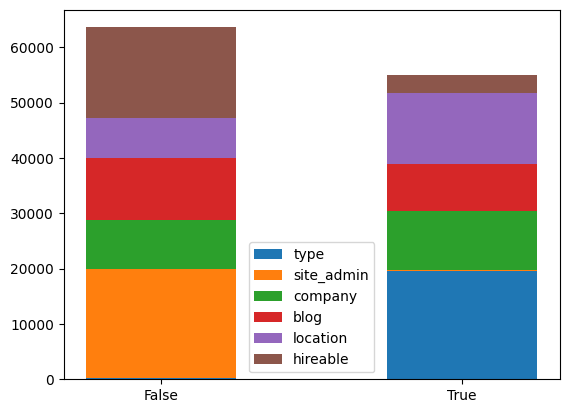

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_colwidth', 9)

raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['updated_at'] = pd.to_datetime(raw_data['updated_at'])
raw_data['public_repos'] = np.log1p(raw_data['public_repos'])
raw_data['public_gists'] = np.log1p(raw_data['public_gists'])
raw_data['followers'] = np.log1p(raw_data['followers'])
raw_data['following'] = np.log1p(raw_data['following'])

categories = ['False', 'True']
num_type = [0, 0]
num_site_admin = [0, 0]
num_company = [0, 0]
num_blog = [0, 0]
num_location = [0, 0]
num_hireable = [0, 0]
num = raw_data.shape[0]
for i in range(num):
    num_type[int(raw_data.loc[i, 'type'])] += 1
    num_site_admin[int(raw_data.loc[i, 'site_admin'])] += 1
    num_company[int(raw_data.loc[i, 'company'])] += 1
    num_blog[int(raw_data.loc[i, 'blog'])] += 1
    num_location[int(raw_data.loc[i, 'location'])] += 1
    num_hireable[int(raw_data.loc[i, 'hireable'])] += 1
x = np.arange(len(categories))
bottom = np.zeros(len(categories))
plt.bar(x, num_type, width=0.5, label='type', tick_label=categories)
bottom += num_type
plt.bar(x, num_site_admin, width=0.5, bottom=bottom, label='site_admin')
bottom += num_site_admin
plt.bar(x, num_company, width=0.5, bottom=bottom, label='company')
bottom += num_company
plt.bar(x, num_blog, width=0.5, bottom=bottom, label='blog')
bottom += num_blog
plt.bar(x, num_location, width=0.5, bottom=bottom, label='location')
bottom += num_location
plt.bar(x, num_hireable, width=0.5, bottom=bottom, label='hireable')
plt.legend()

plt.show()


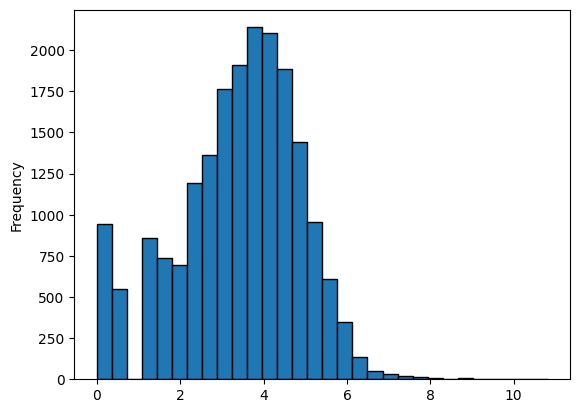

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_colwidth', 9)

raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['updated_at'] = pd.to_datetime(raw_data['updated_at'])
raw_data['public_repos'] = np.log1p(raw_data['public_repos'])
raw_data['public_gists'] = np.log1p(raw_data['public_gists'])
raw_data['followers'] = np.log1p(raw_data['followers'])
raw_data['following'] = np.log1p(raw_data['following'])

raw_data['public_repos'].plot.hist(bins = 30, edgecolor = 'black')
plt.show()

根据直方图可以看出大致呈正态分布

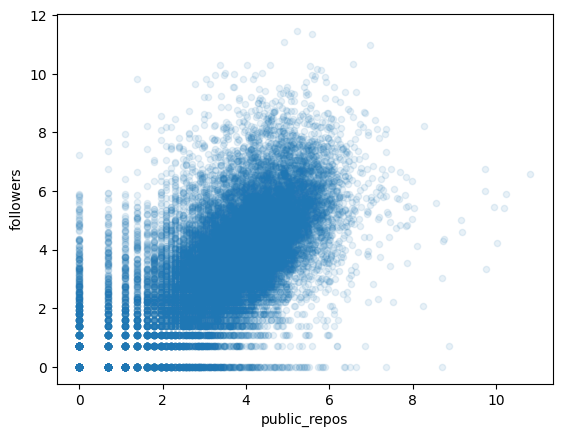

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_colwidth', 9)

raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['updated_at'] = pd.to_datetime(raw_data['updated_at'])
raw_data['public_repos'] = np.log1p(raw_data['public_repos'])
raw_data['public_gists'] = np.log1p(raw_data['public_gists'])
raw_data['followers'] = np.log1p(raw_data['followers'])
raw_data['following'] = np.log1p(raw_data['following'])

raw_data.plot.scatter(x = 'public_repos', y = 'followers', alpha = 0.1)
plt.show()

根据散点图可以大致猜测两者呈正相关关系

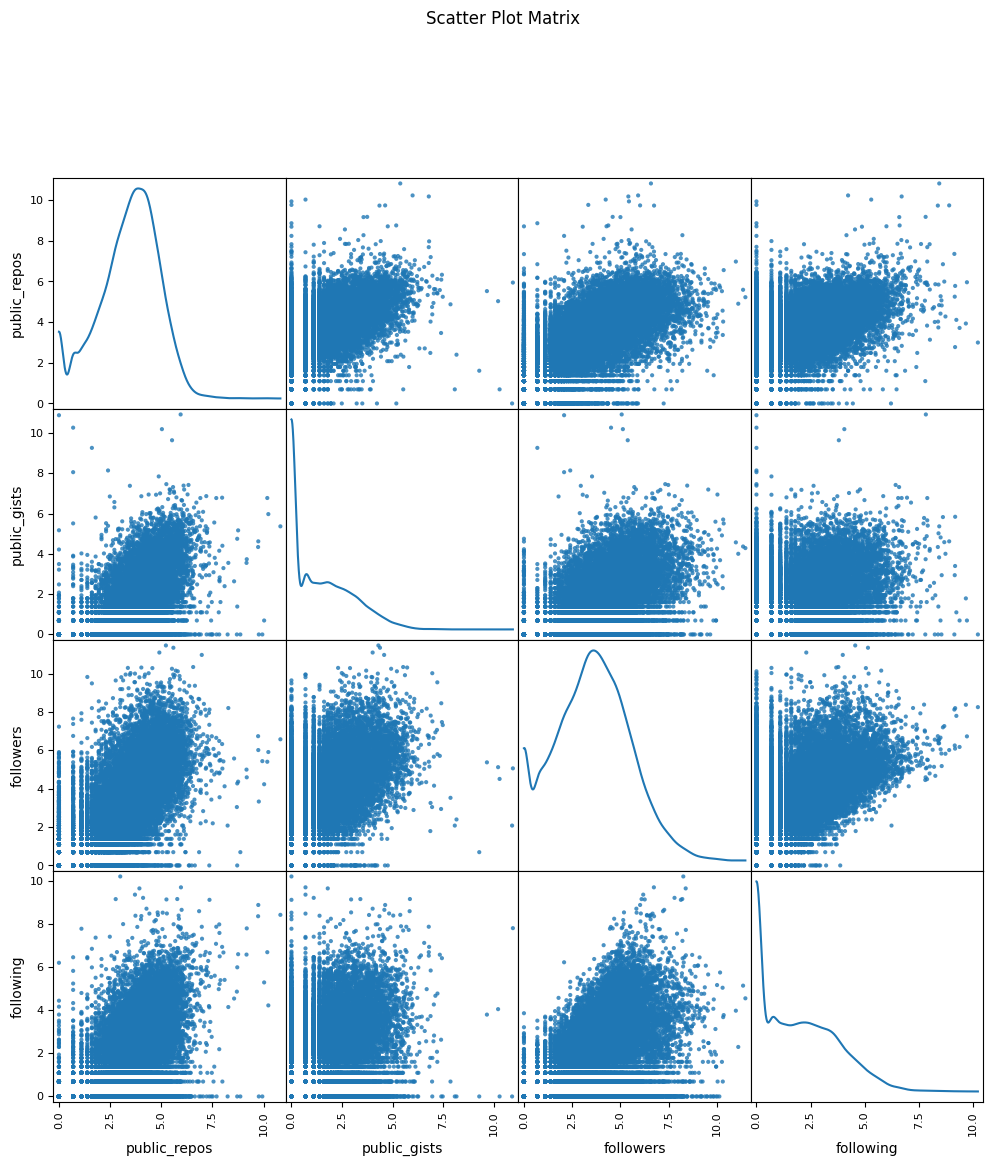

In [39]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_colwidth', 9)

raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['updated_at'] = pd.to_datetime(raw_data['updated_at'])
raw_data['public_repos'] = np.log1p(raw_data['public_repos'])
raw_data['public_gists'] = np.log1p(raw_data['public_gists'])
raw_data['followers'] = np.log1p(raw_data['followers'])
raw_data['following'] = np.log1p(raw_data['following'])
scatter_matrix(raw_data[['public_repos', 'public_gists', 'followers', 'following']], alpha=0.8, figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。

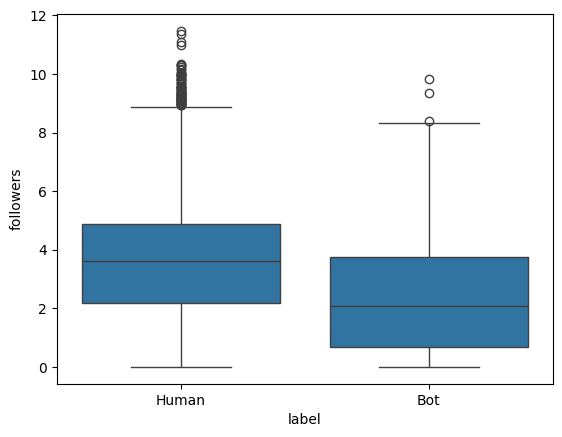

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_colwidth', 9)

raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['updated_at'] = pd.to_datetime(raw_data['updated_at'])
raw_data['public_repos'] = np.log1p(raw_data['public_repos'])
raw_data['public_gists'] = np.log1p(raw_data['public_gists'])
raw_data['followers'] = np.log1p(raw_data['followers'])
raw_data['following'] = np.log1p(raw_data['following'])
sns.boxplot(x = 'label', y = 'followers', data = raw_data[['label', 'followers']])
plt.show()

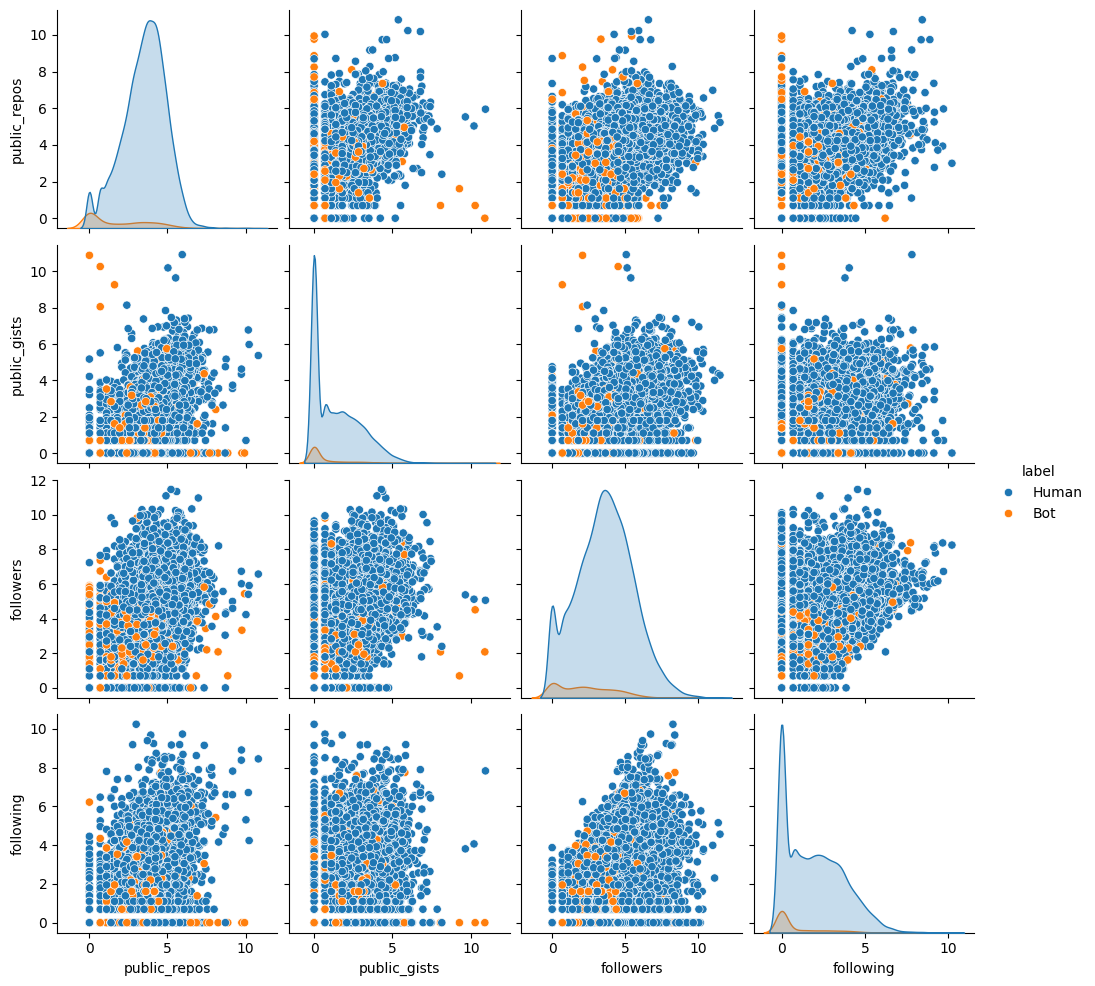

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_colwidth', 9)

raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['updated_at'] = pd.to_datetime(raw_data['updated_at'])
raw_data['public_repos'] = np.log1p(raw_data['public_repos'])
raw_data['public_gists'] = np.log1p(raw_data['public_gists'])
raw_data['followers'] = np.log1p(raw_data['followers'])
raw_data['following'] = np.log1p(raw_data['following'])

sns.pairplot(raw_data, vars = ['public_repos', 'public_gists', 'followers', 'following'], hue = 'label')
plt.show()

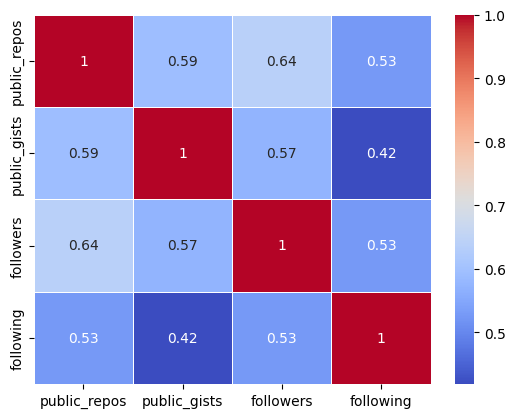

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_colwidth', 9)

raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['updated_at'] = pd.to_datetime(raw_data['updated_at'])
raw_data['public_repos'] = np.log1p(raw_data['public_repos'])
raw_data['public_gists'] = np.log1p(raw_data['public_gists'])
raw_data['followers'] = np.log1p(raw_data['followers'])
raw_data['following'] = np.log1p(raw_data['following'])
sns.heatmap(raw_data[['public_repos', 'public_gists', 'followers', 'following']].corr(), annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.show()

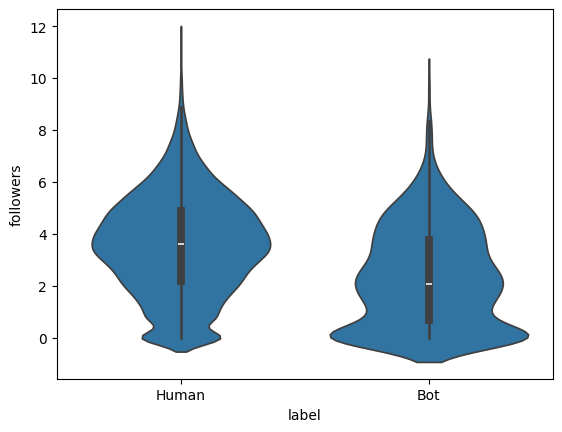

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_colwidth', 9)

raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['updated_at'] = pd.to_datetime(raw_data['updated_at'])
raw_data['public_repos'] = np.log1p(raw_data['public_repos'])
raw_data['public_gists'] = np.log1p(raw_data['public_gists'])
raw_data['followers'] = np.log1p(raw_data['followers'])
raw_data['following'] = np.log1p(raw_data['following'])
sns.violinplot(x = 'label', y = 'followers', data = raw_data[['label', 'followers']])
plt.xlabel('label')
plt.ylabel('followers')
plt.show()

7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

raw_data = pd.read_csv('data//github_bot_processed_data.csv')
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.max_colwidth', 9)

raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['updated_at'] = pd.to_datetime(raw_data['updated_at'])
raw_data['public_repos'] = np.log1p(raw_data['public_repos'])
raw_data['public_gists'] = np.log1p(raw_data['public_gists'])
raw_data['followers'] = np.log1p(raw_data['followers'])
raw_data['following'] = np.log1p(raw_data['following'])
profile = ProfileReport(raw_data)
# profile.to_notebook_iframe()
profile.to_file("your_dataset_profile.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 130.90it/s]
